# Day 22 Part 1 In-class Assignment: Modeling forest fires with an Agent-based Model 

### <p style="text-align: right;"> &#9989; Andrew.</p>

#### <p style="text-align: right;"> &#9989; Put your group member names here.</p>

<img src="https://cdn-images-1.medium.com/max/2000/1*VO9nuzrJ9XseMyxdtPh_vg.jpeg" width=500>

## Goals of this assignment

The primary goal of this assignment is to model the spread of a forest fire using an agent-based model (ABM).  In doing so, we will:

* Use ABM to model forest fires
* Examine and quantify the concept of a "tipping point" in a model.

## Assignment instructions

Work with your group to complete this assignment. The first part of the assignment involves working out a plan for your model on the whiteboards and taking a picture of it. This picture should be uploaded to D2L along with your notebook in the appropriate submission folder. The assignment is due at the end of class.

---
## Welcome to Part 1 of a 2-part ICA!

We have split this assignment over two days, so that you can become more comfortable with material. On the first day, you will build the basics of the forest fire model and the second day you will analyze the model and the tipping point! Let's get started!

## Reviewing the motivation for the model

### Why model forest fires?

While this isn't a huge problem in Michigan, the _states in the western United States having been suffering a tremendous problem with huge and difficult-to-control forest fires_.  This comes from a combination of extended drought conditions, dense woodlands, and forest management policies that suppress small fires and thus ensure that large quantities of dead, dry trees and brush are available to burn when a large fire inevitably starts (typically from lightning strikes, but occasionally from negligent campers, or recently from gender-reveal celebrations).  In recent years, this has been exacerbated by climate change, which has both caused drought conditions to be more severe and allowed tree-killing diseases and insects to flourish, which produces more dead, easily-burned wood.

These forest fires destroy ecosystems and peoples' homes and other property, and can result in the loss of human and animal life.  A key challenge in forest management is to attempt to contain these huge forest fires once they start, in order to protect human lives, settlements, and infrastructure.  To that end, it is critical to have models of how fire spreads in various conditions; see, for example, the [Open Wildland Fire Modeling group](https://wiki.openwfm.org/wiki/Open_Wildland_Fire_Modeling_E_community_Wiki).


---
## The Rules for Our Model

### Setup
The model is a two-dimensional square $N \times N$ array that represents the forested region we're simulating.  **The cells in the array can have three values:** 
- **0 (empty)** 
- **1 (trees)** 
- **2 (on fire)**  

At the beginning of the model, a user-specified fraction of the cells $f_{\text{trees\_start}}$ are randomly filled with trees and the remaining cells are empty.  
**One edge of the board (say, the entire leftmost column) is set on fire.**


### Neighborhoods
Each cell has a "neighborhood" that is composed of its four neighbors to the left, right, above, and below it. **If a cell is along one of the edges of the array, only consider the neighbors that it has** (i.e., don't try to go out of the bounds of the array).

<div align="center"><img src="https://i.ibb.co/zH9YL38/indexing-example.png" alt="indexing-example" border="0" width=200px></div>

### Evolving with Time
The model takes steps forward in time, where every cell is modified based on the previous step.  The model evolves as follows:

* **If the cell was empty last turn, it stays empty this turn.**
* **If the cell is a tree and any of its neighbors were on fire last turn, it catches on fire.**
* **If the cell was on fire last turn, the fire has consumed all of the trees and it is now empty.**

### Ending Conditions

**The model evolves forward in time until all of the fires have burned out.**

After this happens, you can calculate the fraction of the cells that still have trees at the end of the model ($f_{\text{trees\_end}}$) and the fraction of cells that are empty ($f_{\text{empty}}$).  The fraction of burned cells, $f_\text{burned}$, is just the difference between the fraction of cells that were initially trees and the fraction of cells that are trees at the end of the model; in other words,

$f_\text{burned} = f_\text{trees\_start} - f_\text{trees\_end}$



## Your mission at the end of the entire assignment:

Your mission is to answer the question: "How does the spread of fire relate to the density of the forest?"  
More precisely, we're asking "How does $f_\text{burned}$ depend on $f_\text{trees\_start}$?"

To achieve this mission, we will break this down into a few parts:

---
### Part 1:  Planning your solution

&#9989;&nbsp; As a group, create a plan to implement this model for an arbitrary value of $f_\text{trees\_start}$.  Make sure that you think about how to set up the initial conditions, how to evolve the model, and how to calculate the fraction of trees and empty cells that remain in the end. What will the board look like to start? What will it look like in the end? How will the forest fire move?

**Important**: Make sure you discuss how you will handle cells that are on the boundaries of your 2D board!

**Make sure to chat with an instructor after you have completed this step. Do not spend more than 20 minutes on this part of the activity!**


<font size="+3">&#9998;</font> *The code below is scaffolded. We plan to use the code from the pre class to check cells, and burn them using the output lists in some iterative form.*

___
### Part 2: Implementing your solution

Now we're going to work through a combination of provided code and code that you have to write. The goal is to have all the pieces to build the forest fire model by the end of class!

Make sure to execute the following cell of imports before you move on!

In [2]:
# standard includes
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt

# Next we are going to import some specific libraries we will use to get the animation to work cleanly
from IPython.display import display, clear_output
import time  

### 2.1 First important function: Plotting the grid!

Take a look at the `plotgrid` function. You were given a similar one in your pre-class assignment. We'll be using this code a lot for displaying your forest, so we want to make sure you understand it.

&#9989;&nbsp; **Complete the code below, by filling in the "___" spots, and add comments to explain what each line of the code is doing.**

In [3]:
# Function plotgrid() does what??

def plotgrid(myarray):
    
    # 
    x_range = np.linspace(0, myarray.shape[1]-1, myarray.shape[1]) 
    y_range = np.linspace(0, myarray.shape[0]-1, myarray.shape[0]) # repeat for the y/vertical axis
    
    # 
    x_indices, y_indices = np.meshgrid(x_range, y_range)
    
    # 
    tree_x = x_indices[myarray == 1];   
    tree_y = y_indices[myarray == 1]; 
    fire_x = x_indices[myarray == 2];   
    fire_y = y_indices[myarray == 2]; 
    
    # 
    plt.plot(tree_x, myarray.shape[0] - tree_y - 1, 'gs',markersize=10)   
    plt.plot(fire_x, myarray.shape[0] - fire_y - 1, 'r^',markersize=10)  # repeat for indices with fire 2
    
    # 
    plt.xlim([-1,myarray.shape[1]])
    plt.ylim([-1,myarray.shape[0]]) 

    # 
    plt.tick_params(axis='both', which='both',
                    bottom=False, top=False, left=False, right=False,
                    labelbottom=False, labelleft=False)

### 2.2 Initializing the forest

Before you can run a forest model, you need to initialize the board. You should have already attempted to do this in your pre-class assignment, but we're providing the following code for you to ensure that everyone in your group is working with the same version.

&#9989;&nbsp; **Take a look at it and make sure you understand it. How does it compare to the code that you wrote?**

In [4]:
def set_board(board_size=50,f_trees_start=0.5):
    '''
    Creates the initial game board.

    Inputs:
        board_size: length of one edge of the board
        f_trees_start: probability that a given cell is a tree
                       (effectively the tree density)

    Outputs a 2D numpy array with values set to either 0, 1, or 2
        (empty, tree, or fire)
    '''
    
    # all cells initialized to 'empty' (0) by default
    game_board = np.zeros((board_size,board_size),dtype='int64')
    
    # loop over board and roll the dice; if the random number is less
    # than f_trees_start, make it a tree.
    for i in range(board_size):
        for j in range(board_size):
            if rand.random() <= f_trees_start:
                game_board[i,j] = 1

    # set the whole left edge of the board on fire. We're arsonists!
    game_board[:,0] = 2
    
    return game_board

#### &#9989;&nbsp; 2.3 Testing your Code

Execute the cell below to make sure that your `plotgrid()` and `set_board()` functions are working correctly. Your output should match this picture. 

![Reference figure](https://github.com/msu-cmse-courses/cmse201-F21-data/blob/main/Day-18/smallboard_test.png?raw=true)

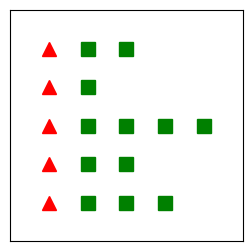

In [5]:
# run this cell
rand.seed(1234)
fig = plt.figure(figsize=(3,3))
small_board = set_board(board_size=5, f_trees_start = 0.75)
plotgrid(small_board)

#### &#9989;&nbsp; 2.3 Exploring the `set_board()` and `plotgrid()`! 

Now, create a board using the default arguments for the `set_board()` function and plot the board with `plotgrid()`. Once you have done that, answer these questions. 

- Does the fire show up in the places you want? 
- Does the tree fraction or board size change accordingly when you change the input parameters? 
- What happens if you make the board size much larger than the default?


<font size="+3">&#9998;</font> *Put your answer here*

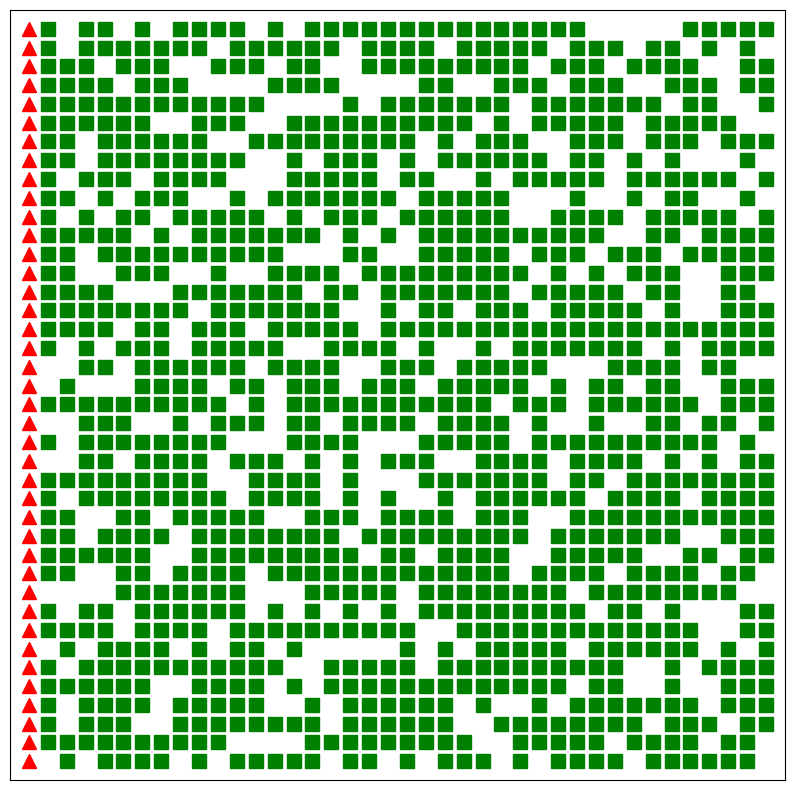

In [6]:
# put your test code here. Make a plot to check it.
# we're going to define a default figure size for you to make things look nice
fig = plt.figure(figsize=(10,10))
big_board = set_board(board_size=40, f_trees_start = 0.75)
plotgrid(big_board)

&#9989;&nbsp; **Task:** Explain the process of initializing the forest to someone who has never coded before. What are the rules? What do we hope the board looks like at the start?

<font size="+3">&#9998;</font> *The forest board uses a random seed of numbers 0-1, and the plotting function reads the seed to generate a board. Trees are placed for some portion of numbers defined by the user, and arranged by the code which loops through the length of the board and reads each value*

---
### Part 3: The main event: Make the Fire Spread (evolving over time)!

Clearly the most import part of an agent-based model is figuring out how your agents should behave in your simulation. 

#### &#9989;&nbsp; 3.1 In this model, the main agent you have to deal with is the fire. Your job is to write the function that controls how the fire moves. 

The skeleton function provided below:
- Takes in the _current_ board, 
- Defines a _new_ board with the same properties as the old board but full of 0s to start, and then 
- Returns that _new_ board where the positions of the trees and fire have been updated. 

Make sure you are updating the values on the **new board**, based on the values of the **current board!** This function on it's own is only responsible for one step in time. It takes in the current state of the board and based on that state, defines the next state of the board. 

To avoid needless scrolling **here are the rules of the model again**:

> Each cell has a "neighborhood" that is composed of its four neighbors to the left, right, above, and below it.  (Note: not the diagonal elements!)  If a cell is along one of the edges of the array, only consider the neighbors that it has, and doesn't try to go out of the bounds of the array!
>
>The model takes steps forward in time, where every cell is modified based on the previous step.  The model evolves as follows:
>
>* If the cell was empty last turn, it stays empty this turn.
>* If the cell is a tree and any of its neighbors were on fire last turn, it catches on fire.
>* If the cell was on fire last turn, the fire has consumed all of the trees and it is now empty.

**The function contains comments to suggest the steps that you need to implement to make it work.** Think about how the board is set up and how to access the elements within the board. 

**The functions `OnBoard` and `getNeighborValues` from last class will be very helpful for this function!** But remember, if you want to use those functions, you need to copy them into your notebook and make sure to execute their code before you try to use them.

In [79]:
#Finish this code
# Finish this code
def onBoard(i, j, image):
    ni = image.shape[0] # number of pixels (height)
    nj = image.shape[1] # number of pixels (width)
    if i <= ni-1 and i >= 0 and j <= nj-1 and j>=0: # You need some more conditions here! 
                                         # We've checked i, but what about j?
        return True
    else:
        return False
    
def getNeighborValues(i,j, zebra_array):
    # The following list contains the indices of the neighbors for a pixel at (i.j)
    # But remember, we need to check if the neighbor is on the board when we try to get its value!
    neighborhood = [(i-1, j), (i, j-1), (i+1, j), (i, j+1)]
    
    neighbor_values = []
    for neighbor in neighborhood:
        if onBoard(neighbor[0],neighbor[1],zebra_array):
            neighbor_values.append(zebra_array[neighbor])
        #else:
        #    neighbor_values.append(-1)
    #print(neighbor_values)
    return neighbor_values

In [8]:
def advance_board(game_board):
    '''
    Advances the game board using the given rules.
    Input: the initial game board.
    Output: the advanced game board
    '''
    ni = game_board.shape[0] # number of pixels (height)
    nj = game_board.shape[1] # number of pixels (width)
    
    # create a new array that's just like the original one, but initially set to all zeros (i.e., totally empty)
    new_board = np.zeros_like(game_board)
    
    # loop over each cell in the board and decide what to do.
    # You'll need two loops here, one nested inside the other.
    for i in range(ni):
        for j in range(nj):
            # Now that we're inside the loops we need to apply our rules
        
            # if the cell was empty last turn, it's still empty.
            # if it was on fire last turn, it's now empty.
            if game_board[i,j] == 1:
                neigbors = getNeighborValues(i,j,game_board)
                if any(neigbor == 2 for neigbor in neigbors):
                    new_board[i,j] = 2
                else:
                    new_board[i,j]=1
            elif game_board[i,j] == 2:
                new_board[i,j] = 0    

    # return the new board
    return new_board

In [9]:
def create_firelist(game_board):
    firelist = []
    ni = game_board.shape[0]
    nj = game_board.shape[1]
    for i in range(ni):
        for j in range(nj):
            if game_board[i,j] == 2:
                firelist.append((i,j))
    return firelist


In [10]:
firelist = create_firelist(big_board)


In [11]:
def locate_neighbors(i,j):
    return [(i-1, j), (i, j-1), (i+1, j), (i, j+1)]


In [76]:
def fast_advance_board(game_board,firelist):
    '''
    Advances the game board quickly.
    Input: the initial game board and locations that will need updates.
    Output: the advanced game board and new update locations
    '''

    new_fire = []

    for i,j in firelist:
        #print(i,j)
        neigbors = locate_neighbors(i,j)
        
        for neighbor in neigbors:
            if onBoard(neighbor[0],neighbor[1],game_board):
                if game_board[neighbor[0],neighbor[1]] == 1:
                    game_board[neighbor[0],neighbor[1]] = 2
                    new_fire.append((neighbor[0],neighbor[1]))
        game_board[i,j] = 0
    #print(len(firelist))
    #print(len(new_fire))
    # return the new board
    return game_board, list(set(new_fire))

#### &#9989;&nbsp; 3.2 As good coders, we always test our new functions! Test your function above and make sure it works! 

Run the code a few times to see whether fire advances according to the rules. You can start with any sort of initial board that you want, you can even just use the default board for the purpose of testing. Remember the advance_board function only advances one step in time. 

In [13]:
import time
from IPython.display import display, clear_output

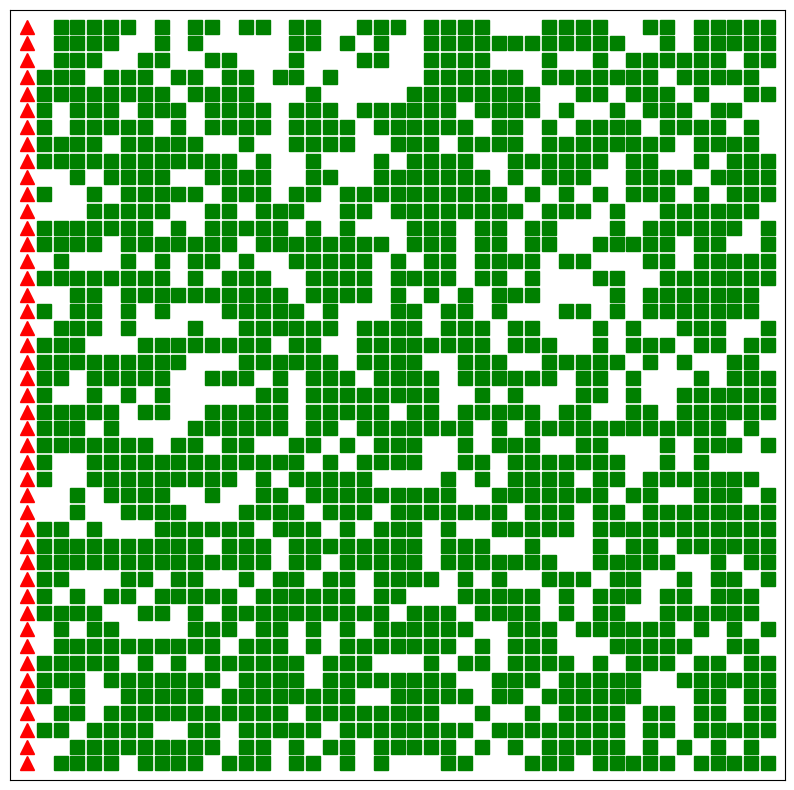

In [44]:
# Initialize a new board here
fig = plt.figure(figsize=(10,10))
big_board = set_board(board_size=45, f_trees_start = 0.70)
plotgrid(big_board)


In [35]:
firelist
big_board, firelist = fast_advance_board(big_board, fire_list)

507835
60


In [ ]:
from IPython.display import display, clear_output
import time 

In [95]:
input_size = 50
percent_trees = .62

big_board = set_board(board_size=input_size, f_trees_start = percent_trees)


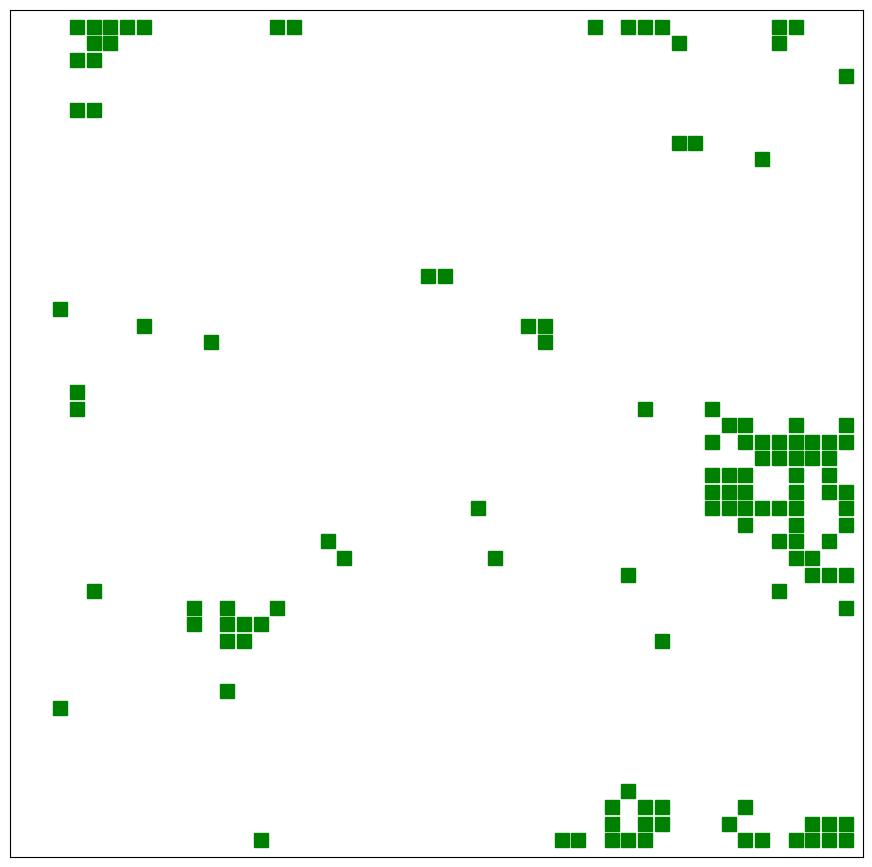

0
with a board size of 50 and 62.0 % tree covering, 1539 trees became 127 a 91 % drop


In [96]:


fig = plt.figure(figsize=(11,11)

firelist = create_firelist(big_board)

tree_i = len(big_board[big_board == 1])

while len(firelist) != 0: 
    #inputs = firelist
    big_board, firelist = fast_advance_board(big_board, firelist)
    
    plotgrid(big_board)   
    
    # Animation part 
    #time.sleep(0.1)         # Sleep for half a second to slow down the animation
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots
    print(len(firelist))
tree_f = len(big_board[big_board == 1])

print('with a board size of', input_size, 'and', percent_trees * 100, '% tree covering,', tree_i, 'trees became', tree_f, 'a', int((1-tree_f/tree_i)*100), '% drop')

plt.close()                 # Close dynamic display

In [119]:
from scipy.optimize import curve_fit
def logistic_function(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

def gompertz_function(x, a, b, c):
    return a * np.exp(-b * np.exp(-c * x))

C:\Users\andre\AppData\Local\Temp\ipykernel_14080\1655852282.py:3: RuntimeWarning: overflow encountered in exp
  return L / (1 + np.exp(-k * (x - x0)))


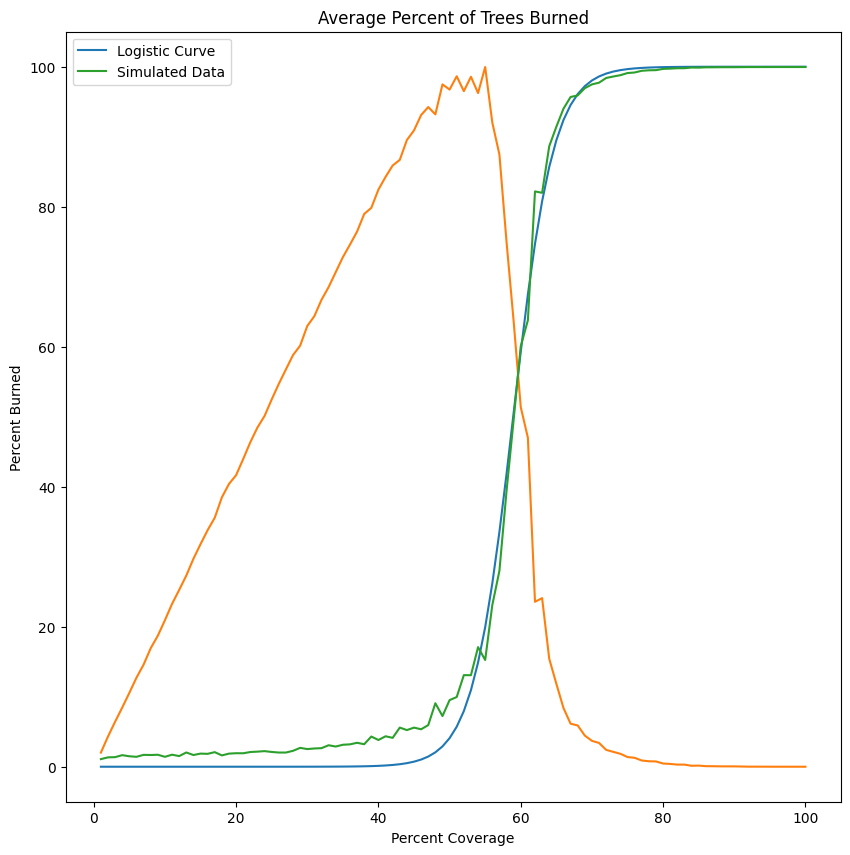

In [131]:
percent_list = np.arange(.01, 1.01, 0.01)
fig = plt.figure(figsize=(10,10))
all_lists = []
total_vals_lists = []

for i in range(20):
    percent_drop = []
    tovals = []
    for percentage in percent_list:
        input_size = 70
        percent_trees = percentage

        big_board = set_board(board_size=input_size, f_trees_start = percent_trees)
        firelist = create_firelist(big_board)

        tree_i = len(big_board[big_board == 1])

        if tree_i != 0:
            while len(firelist) != 0: 
                big_board, firelist = fast_advance_board(big_board, firelist)

            tree_f = len(big_board[big_board == 1])
            percent_drop.append((1-tree_f/tree_i)*100)
            tovals.append(tree_f)
        else:
            percent_drop.append(0)
            tovals.append(0)
        
        #plotgrid(big_board)   
        #clear_output(wait=True) # Clear output for dynamic display
        #display(fig)            # Reset display
        #fig.clear()
    all_lists.append(percent_drop)
    total_vals_lists.append(tovals)
array_list = np.column_stack(all_lists)
array_tovals = np.column_stack(total_vals_lists)
row_averages = np.mean(array_list, axis=1)
toval_averages = np.mean(array_tovals, axis = 1)
toval_unitless = toval_averages/toval_averages.max()*100
#analysis
popt, pcov = curve_fit(logistic_function, percent_list*100, row_averages, maxfev=10000)
L, k, x0 = popt

y_fit = logistic_function(percent_list*100, *popt)

#popt1, pcov1 = curve_fit(gompertz_function, percent_list*100, row_averages, maxfev=10000)
#L1, k1, x01 = popt1

y_fit = logistic_function(percent_list*100, *popt)
#y_fit1 = gompertz_function(percent_list*100, *popt1)

plt.plot(percent_list*100,y_fit,label='Logistic Curve')
#plt.plot(percent_list*100,y_fit1,label='Gompertz Curve')
plt.plot(percent_list*100,toval_unitless)
plt.plot(percent_list*100,row_averages,label='Simulated Data')
plt.title('Average Percent of Trees Burned')
plt.xlabel('Percent Coverage')
plt.ylabel('Percent Burned')
plt.axvline()
plt.legend()
plt.show()

In [124]:
print(popt)

[99.75831141  0.43011928 59.20165464]


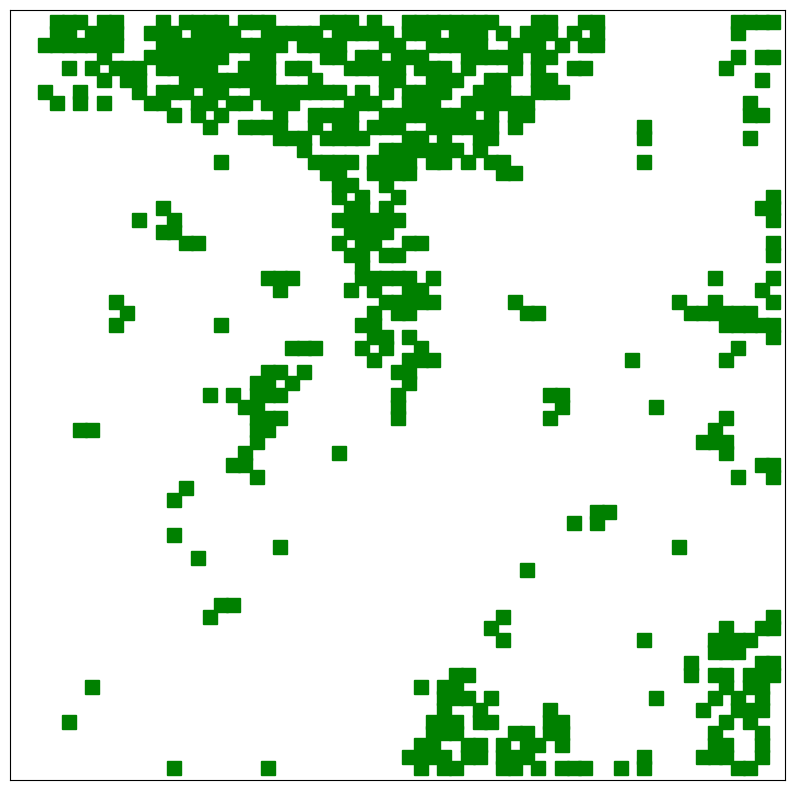

In [ ]:
# This lets us make and clear plots without creating new ones
from IPython.display import display, clear_output

# We can use this to have images show up with some user-specified spacing in time
import time 

# Create a figure
fig = plt.figure(figsize=(10,10))

# Run animation for 10 iterations
while (big_board==2).any(): 
    
    big_board = advance_board(big_board)
    plotgrid(big_board)   
    
    # Animation part 
    #time.sleep(0.1)         # Sleep for half a second to slow down the animation
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots

plt.close()                 # Close dynamic display

#### &#9989;&nbsp; 3.3 Preparing for Next Class

Great work! You now have code that begins to model a forest fire! Next class, we are going to use the advance_board function to complete the forest fire model and incorporate the ending conditions. We are also going to analyze the tipping point of the model. 

To prepare us for next class, discuss these questions with your group and write down some of your thoughts:

- How is the advance_board function going to help you model the forest fire? What if you wanted to advance the board 10 steps? Is there an easy way to that? 
- When is the forest fire over? What would the board look like? What might that look like in code? 

<font size="+3">&#9998;</font> *Check out my code above*

---
## Assignment wrapup

Please fill out the form that appears when you run the code below. **You must completely fill this out in order to receive credit for the assignment!** 

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://cmse.msu.edu/cmse201-ic-survey" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

---


## Congratulations, you're done!

Submit this assignment by uploading your notebook and the pictures of your model planning session to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!

&#169; Copyright 2023, Department of Computational Mathematics, Science and Engineering at Michigan State University